# ***Data Analysis for I-Lo test experiment***

## 1) Data
### 1.1) Loading the Data

In [1]:
# importing the packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the data:
data_I_Lo = pd.read_csv("data/data_I-Lo.csv")

### 1.2) Prepping the Data

In [3]:
# excluding all unnecessary columns:
data_I_Lo = data_I_Lo.loc[:, ~data_I_Lo.columns.isin(['CASE', 'SERIAL','REF','MODE','STARTED','QUESTNNR','MAILSENT','LASTDATA','QVIEWER',
                                                        'LASTPAGE','MAXPAGE','MISSING','MISSREL','TIME_REL','TIME001','TIME002',
                                                        'TIME003','TIME004','TIME005','TIME006','TIME007','TIME008','TIME009',
                                                        'TIME010','TIME011','TIME012','TIME013','TIME_SUM','TIME_RSI','Q_VIEWER',
                                                        'FINISHED','DEG_TIME','P004_01', 'P008_01'])]

# split into VR_data
data_VR = data_I_Lo[data_I_Lo.columns[1:76]]

# and experience data
data_exp = data_I_Lo[data_I_Lo.columns[76:]]

As a first step, we will have a look at the data to see whether everything is complete.

In [4]:
data_I_Lo

,E001_01,E001_02,E001_03,E001_04,E001_05,E001_06,E001_07,E001_08,E002_01,E002_02,...,P005_03,P005_04,P005_05,P006_01,P006_02,P006_03,P006_04,P006_05,P006_06,P007
0,4,4,4,4,3,3,4,4,4,4,...,4,5,2,5,5,5,4,4,4,2
1,5,5,5,5,4,5,4,5,5,5,...,5,5,5,5,5,5,4,5,4,2
2,4,4,4,4,3,3,4,3,4,4,...,5,4,4,5,4,5,4,5,4,2
3,5,5,4,5,5,5,5,5,5,5,...,5,5,5,5,5,4,4,5,3,2
4,4,4,4,4,3,3,4,5,4,4,...,5,5,3,4,5,5,3,4,1,1
5,4,4,3,4,4,3,3,4,4,4,...,4,4,3,5,5,5,4,4,4,2
6,5,5,5,5,4,5,5,5,5,5,...,5,5,3,5,5,4,5,4,4,2


What can be seen is that all participant datasets are fully present (101 columns, one for each answer).

Now, it is important to see whether there are any np.NaN values or whether participants answered with "don't know" which is represented 

In [5]:
print(data_I_Lo.isnull().values.any())
print((data_I_Lo.values == -1).sum())

# see in which part of the data the -1 occurs
print((data_VR.values == -1).any())
print((data_exp.values == -1).any())

False
1
False
True


What can be seen is that there are no np.NaN values in the entire dataframe. What is the case, though, is that there is one value equal to -1 which means that a participant ticked "don't know" once. More specifically, this value appears in the experience data section, which is even more important to be sorted out. In order to properly work with this case, it is necessary to know where the value is located.

In [6]:
data_exp.loc[data_exp.values == -1]

,P001_01,P001_02,P00_02,P00_03,P00_04,P002_01,P002_02,P002_03,P002_04,P002_05,...,P005_03,P005_04,P005_05,P006_01,P006_02,P006_03,P006_04,P006_05,P006_06,P007
5,4,4,4,3,3,5,5,5,5,-1,...,4,4,3,5,5,5,4,4,4,2


The value could now be found in the data of participant number 5 concerning the question P002_05. Statement was "The device was exhibiting a presence in the virtual environment.". In order to avoid any flaring of the data analysis, this variable should be omitted.

Another variable that is necessary to exclude is the statement "I felt eerie in the presence of the device" (P001_02 & P005_02), as some participants did not know the definition of "eerie" and gave inconsistent ratings.

In [7]:
# excluding P001_02 & P005_02:
data_exp = data_exp.drop(data_exp.columns[1], axis = 1)
data_exp = data_exp.drop(data_exp.columns[12], axis = 1)

# exclude P_002_05:
data_exp = data_exp.drop(data_exp.columns[8], axis = 1)
data_exp = data_exp.drop(data_exp.columns[18], axis = 1)

In [8]:
data_exp

,P001_01,P00_02,P00_03,P00_04,P002_01,P002_02,P002_03,P002_04,P002_06,P003,P005_01,P005_03,P005_04,P005_05,P006_01,P006_02,P006_03,P006_04,P006_06,P007
0,4,4,5,2,4,4,4,4,3,2,4,4,5,2,5,5,5,4,4,2
1,4,5,4,4,2,4,5,4,2,2,4,5,5,5,5,5,5,4,4,2
2,4,5,4,3,4,4,5,4,3,2,4,5,4,4,5,4,5,4,4,2
3,5,5,5,3,4,4,4,3,2,2,5,5,5,5,5,5,4,4,3,2
4,2,5,3,2,3,5,5,4,1,1,4,5,5,3,4,5,5,3,1,1
5,4,4,3,3,5,5,5,5,3,2,4,4,4,3,5,5,5,4,4,2
6,5,4,4,3,4,4,4,4,2,2,4,5,5,3,5,5,4,5,4,2


In [9]:
# among those, divide into speech assistant and robot (necessary: exclude P003 & P007, as they were not rated on the likert scale):
speech_exp = data_exp[data_exp.columns[:9]]
robot_exp = data_exp[data_exp.columns[10: 19]]

# further divide these into the aspects pleasantness and effectiveness:
speech_pl = speech_exp[speech_exp.columns[:4]] # pleasantness & ...
speech_eff = speech_exp[speech_exp.columns[4:]] # effectiveness of speech assistant
robot_pl = robot_exp[robot_exp.columns[:4]] # pleasantness & ...
robot_eff = robot_exp[robot_exp.columns[4:]] # effectiveness of robot

## 2) Function Definitions
### 2.1) Averaging function

In [10]:
def get_means(dataset, mode = ""):
    
    """ returns the mean for each statement or participant in a 
    specific dataset over all participants or statements
    _________________________________________________________
    inputs: dataset (pd.dataframe)
    mode: type of means to take
            
    _________________________________________________________
    output: npy-array with means of all statements / participants"""
    
    if (mode == "s"):
        # create an array for storing values
        means = np.zeros(len(dataset.columns))

        # get started taking means
        for col_index in range (len(dataset.columns)):
            means[col_index] = np.mean(dataset[dataset.columns[col_index]])
            
    elif (mode == "p"):
        # create an array again
        means = np.zeros(len(dataset.index))

        # get started taking means
        for p in range (len(dataset.index)):
            means[p] = np.mean(dataset.iloc[[p]].values)
    else:
        return "Please specify which means you want to take"
        
    return means

### 2.2) Plotting participant means

In [11]:
def means_per_participant(table_speech, table_robot, y_label = "Ranking", title = ""):
    
    """ returns a plot of participant means for robot and
    speech assistant conditions
    _________________________________________________________
    inputs  : datasets speech assistant & robot (pd.dataframe)
    y_label : label to display on the y-axis (str)
    title   : plot header to display in the upper left corner (str)
            
    _________________________________________________________
    output  : matplotlib figure"""
    
    # getting the x-axis ticks:
    labels = np.array("P1")
    
    for p in range (len(table_speech.index) - 1):
        labels = np.append(labels, "P" + str(p+2))
        
    # get the means:
    means_speech = get_means(table_speech, mode = "p")
    means_robot = get_means(table_robot, mode = "p")
    
    # construct the plot:
    plt.figure(figsize = (9, 6))
    plt.plot(labels, means_speech, marker = "<", label = "speech assistant")
    plt.plot(labels, means_robot, marker = ">", label = "robot")
    plt.ylim(0, 5)
    plt.xticks(rotation = 45)
    plt.xlabel("Participant")
    plt.ylabel(y_label)
    plt.legend()
    plt.title(label  = title, loc = "left")
    
    return

### 2.3) Plotting statement means per condition
#### 2.3.1) The plot

In [12]:
def mean_comparison_per_condition(table_speech, tables_robot, mode = "c"):
    
    """ returns a plot of statement means for robot and
    speech assistant conditions
    _________________________________________________________
    inputs  : datasets speech assistant & robot (pd.dataframe)
    mode    : type of plot to construct (str):
                either separating conditions ("s")
                or combining conditions ("c")
            
    _________________________________________________________
    output  : matplotlib figure"""
    
    # taking means:    
    GC_robot_mean = get_means(tables_robot[0], mode = "s")
    Gc_robot_mean = get_means(tables_robot[1], mode = "s")
    gC_robot_mean = get_means(tables_robot[2], mode = "s")
    gc_robot_mean = get_means(tables_robot[3], mode = "s")
    speech_mean = get_means(table_speech, mode = "s")
    
    labels = generate_labels(len(table_speech.columns))
        
    
    # plotting either separated...
    if (mode == "s"):
        for table_cols, means, label in [(0, GC_robot_mean, "average robot +G, +C"), 
                                        (1, Gc_robot_mean, "average robot +G, -C"), 
                                        (2, gC_robot_mean, "average robot -G, +C"), 
                                        (3, gc_robot_mean, "average robot -G, -C")]:
            plt.figure(figsize = (9, 6))
            plt.plot(labels, speech_mean, marker = "<", label = "average speech assistant")
            plt.plot(labels, means, marker = ">", label = label)
            plt.xticks(rotation = 45)
            plt.xlabel("Statements")
            plt.ylabel("Ranking")
            plt.ylim(0, 5.5)
            plt.legend()
            
    # ...or combined:
    elif (mode == "c"):
        plt.figure(figsize = (9, 6))
        for table_cols, means, label in [(0, GC_robot_mean, "average robot +G, +C"), 
                                        (1, Gc_robot_mean, "average robot +G, -C"), 
                                        (2, gC_robot_mean, "average robot -G, +C"), 
                                        (3, gc_robot_mean, "average robot -G, -C")]:
            plt.plot(labels, means, marker = ">", label = label)
        plt.plot(labels, speech_mean, marker = "<", label = "average speech assistant")
        plt.xticks(rotation = 45)
        plt.xlabel("Statements")
        plt.ylabel("Ranking")
        plt.ylim(0, 5.5)
        plt.legend()
        
    
    return

#### 2.3.2) Generation of fitting labels

In [13]:
def generate_labels(count):
    
    """ returns fitting x-axis labels for the conditional plots
    _________________________________________________________
    inputs  : number of labels needed (int)
                - 9 indicate an overall plot
                - 4 indicate a pleasantness plot
                - 5 indicate an effectiveness plot
            
    _________________________________________________________
    output  : labels as a np.array with elements of type str"""
    
    # for overall plots
    if count == 9:
        labels = np.array("S1")
        for s in range (8):
            labels = np.append(labels, "S" + str(s+2))
        return labels
    
    # for pleasantnes plots specifically
    elif count == 4:
        labels = np.array("P1")
        for p in range (3):
            labels = np.append(labels, "P" + str(p+2))
        return labels
    
    # for effectiveness plots specifically
    elif count == 5:
        labels = np.array("E1")
        for e in range (4):
            labels = np.append(labels, "E" + str(e+2))
        return labels

## 3) Application

### 3.1) No condition distinction
#### 3.1.1) Overall Ratings
##### 3.1.1.1) Overall Index

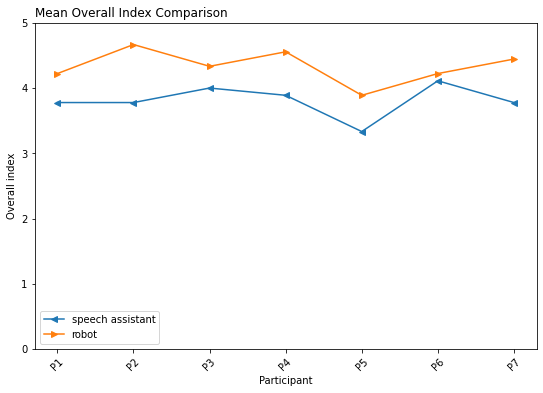

In [14]:
means_per_participant(speech_exp, robot_exp, y_label = "Overall index", title = "Mean Overall Index Comparison")

> What can be seen in this plot is that for every songle participant, the overall index that calculated on the basis of the ratings they gave, is higher for the robot than for the speech assistant. Statement ratings that are included in the overall index are all ratings concerning the interaction with the device - be it regardings the aspect of pleasantness or the aspect of effectiveness. Important to mention is that the index differences between speech assistant and robot are neither homogenous among participants (ranging from 0.1 to 0.7 points on the likert scale), nor siginificant in any way. Nevertheless, this result shows a tendency  that the ratings are generally given in favour of the robot.

##### 3.1.1.2) Overall Rating Means

To summarize this even more, it is helpful to look at means and standard deviations of the overall index distribution across participants, which will be done in the following.

In [15]:
# first, take the means:
means_speech_exp = get_means(speech_exp, mode = "p")
means_robot_exp = get_means(robot_exp, mode = "p")

# second, get averages and standard deviations:
values_exp = {"mean" : [np.mean(means_speech_exp), np.mean(means_robot_exp)],
         "standard deviation"    : [np.std(means_speech_exp), np.std(means_robot_exp)]}

pd.DataFrame(values_exp, index = ["Speech assistant Overall Experience",
                                  "Robot Overall Experience"])

,mean,standard deviation
Speech assistant Overall Experience,3.809524,0.227821
Robot Overall Experience,4.333333,0.237566


> Generally, with equally large standard deviations, it is the case that the robot received higher ranking of roughly 0.5 points on the likert scale. As said before already, even though this result is hardly significant due to a small number of participants, it shows a trend in favour of the robot.

#### 3.1.2) Pleasantness
In the following, the analysis shall go more into detail in order to specify soncerning which of the aspects - pleasantness or effectiveness.
##### 3.1.2.1) Pleasantness Index

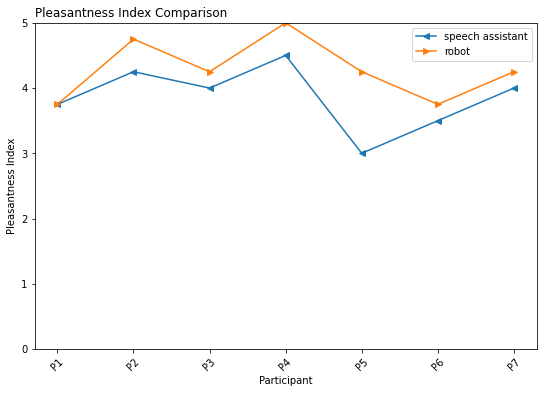

In [16]:
means_per_participant(speech_pl, robot_pl, y_label = "Pleasantness Index", title = "Pleasantness Index Comparison")

> What can be seen here is that for all participants except for one, the robot was perceived as being more pleasant than the robot.

##### 3.1.2.2) Pleasantness Rating Means

In [17]:
# first, take the means:
means_speech_pl = get_means(speech_pl, mode = "p")
means_robot_pl = get_means(robot_pl, mode = "p")

# second, get averages and standard deviations:
values_pl = {"mean" : [np.mean(means_speech_pl), np.mean(means_robot_pl)],
         "standard deviation"    : [np.std(means_speech_pl), np.std(means_robot_pl)]}

# third, create output:
pd.DataFrame(values_pl, index = ["Speech assistant Pleasantness",
                                  "Robot Overall Pleasantness"])

,mean,standard deviation
Speech assistant Pleasantness,3.857143,0.460146
Robot Overall Pleasantness,4.285714,0.431537


> Here, it is to say that, again, the robot received higher ratings (half a point on the likert scale) than the speech assistant with an equally large standard deviation for both devices. In contrast to the overall index, it is the case that, now, both standard deviations are larger.

#### 3.1.3) Effectiveness
##### 3.1.3.1) Effectiveness Index

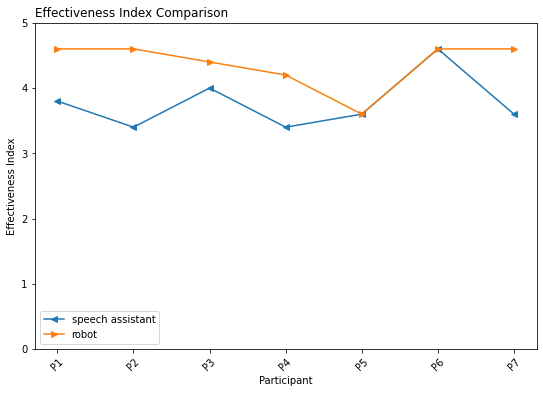

In [18]:
means_per_participant(speech_eff, robot_eff, y_label = "Effectiveness Index", title = "Effectiveness Index Comparison")

> The Effectiveness Index, on the other hand, there are two participants, who rate both the speech assistant, as well as the robot equally effective - even though there is a difference of roughly one likert-scale point between these ratings. All other participants rated the device's effectiveness similarly to the subjective pleasantness: for everyone, the robot was seen as more effective than the speech assistant.

##### 3.1.3.2) Effectiveness Rating Means

In [19]:
# first, take the means:
means_speech_eff = get_means(speech_eff, mode = "p")
means_robot_eff = get_means(robot_eff, mode = "p")

# second, summarize:
values_eff = {"mean" : [np.mean(means_speech_eff), np.mean(means_robot_eff)],
         "standard deviation"    : [np.std(means_speech_eff), np.std(means_robot_eff)]}

# third, create output:
pd.DataFrame(values_eff, index = ["Speech assistant Effectiveness",
                                  "Robot Overall Effectiveness"])

,mean,standard deviation
Speech assistant Effectiveness,3.771429,0.391752
Robot Overall Effectiveness,4.371429,0.345230


> As can be seen in the plot beforehand, the differences are not as drastic as for the overall experience and the pleasnantess index, but with a very small standard deviation, it is the case that the robot received slightly better ratings.

### 3.2) Distinguishing conditions

Because it is the case that the sample size of the different conditions (the participant-condition-ratio) is very small, analyzing the data with respect to the different conditions is not providing a lot of validity to the drawn conclusions. Nevertheless, it might be able to point out trends that could be furth'er investigated, which is why we will investigate as well.

Within the graphs, abbreviations for the different conditions will be used. As there were two aspects - gesture (G) and communication (C) - that could be either advanced or basic, we settled for the following condition definitions: 
- **G+, C+** (advanced gesture, advanced communication)
- **G+, C-** (advanced gesture, basic communication)
- **G-, C+** (no gesture,       advanced communication)
- **G-, C-** (no gesture,       basic communication)

As can be seen, the letter always indicates which aspect is meant, while the plus / minus indicates whether the corresponsing aspect is either basic (-) or advanced (+).

#### 3.2.1) Preparing the datasets

An important thing to mention at this point is the fact that we do not split the speech assisant data according to the different conditions. We are assuming that the ratings, participants gave after the first VR-session, are independent of the condition they were tested in. Up to the point of the second VR-session, all participants completed a conceptually identical experiment, which is why we do not split the speech assistant datasets in the following.

In [20]:
# overall:
GC_robot_overall = robot_exp.iloc[[2, 6]]
Gc_robot_overall = robot_exp.iloc[[1, 5]]
gC_robot_overall = robot_exp.iloc[[0, 4]]
gc_robot_overall = robot_exp.iloc[[3]]

# pleasantness:
GC_robot_pl = robot_pl.iloc[[2, 6]]
Gc_robot_pl = robot_pl.iloc[[1, 5]]
gC_robot_pl = robot_pl.iloc[[0, 4]]
gc_robot_pl = robot_pl.iloc[[3]]

# effectiveness:
GC_robot_eff = robot_eff.iloc[[2, 6]]
Gc_robot_eff = robot_eff.iloc[[1, 5]]
gC_robot_eff = robot_eff.iloc[[0, 4]]
gc_robot_eff = robot_eff.iloc[[3]]

#### 3.2.2) Overall

Even though we are now looking at the individual conditions, the following analysis will stick to the same scheme as the part where no condition distinction was included. This way, we will firstly inquire the overall index, before going into detail with looking at the subjective feeling of pleasantness and effectiveness participants refelcted by giving their rankings.

##### 3.2.2.1) Separated Plots
In the following plots, rating curve for the speech assistant is identical. These plots serve to look at how there were differences between the common speech assistant and one particular condition.

Furthermore, the plots are strucutred ina different way. Instead of the participants (why would only be two at maximum in each condition), the x-axis indicates the different statements, participants were asked to rate. As such, the values cannot be understood as the overall index that was calculated beforehand, but represent the mean rating participants gave for a certain statement.

The statements are the following:
- S1 : The introduction that I received was pleasant.
- S2 : I was comfortable moving around.
- S3 : I understood the introduction well.
- S4 : Making conversation with the device was easy.
- S5 : I included the device when working on the tasks.
- S6 : The device helped solving the tasks.
- S7 : The device was essential for solving the tasks.
- S8 : To me, the device was part of the furniture and nothing more. (reversed)
- S9 : The device did nothing more than answering my questions. (reversed)

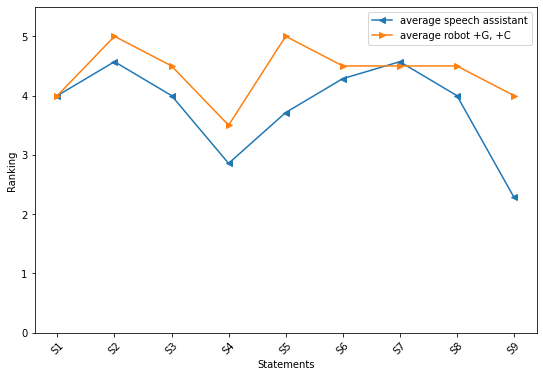

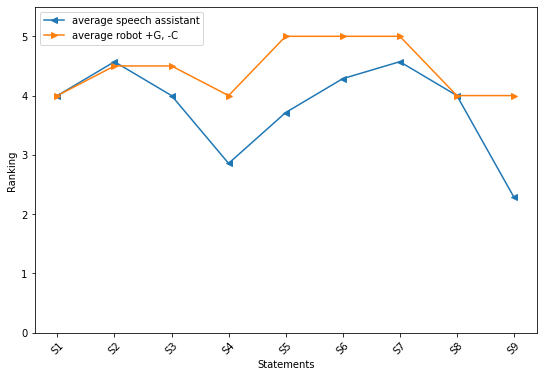

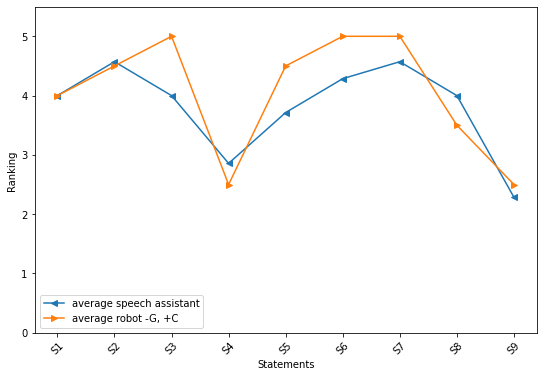

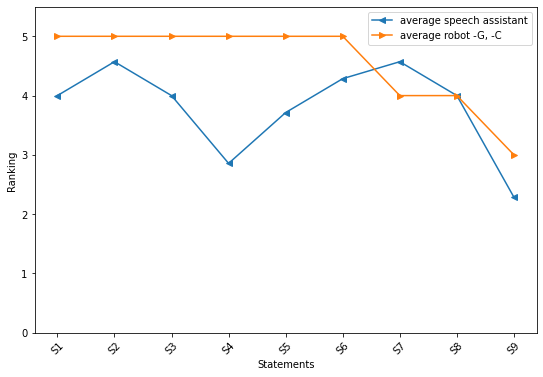

In [21]:
mean_comparison_per_condition(speech_exp, [GC_robot_overall, Gc_robot_overall, gC_robot_overall, gc_robot_overall], mode = "s")

> What is important to note when looking at these graphs is that there were generally not more than two participants per condition and in the last condition (G-, C-), there was only one participant even. What is interesting to note is that for all cases, there are particular statement where the robot scored less or at least not better than the speech assistant device. This can also be due to the fact that the speech assistant curve is the average of all participants while the robot graph never comprises more than two different participant subsets of the data.

> The results follow the general scheme though since, in most cases, the robot receives higher rankings than the speech assistant.

##### 3.2.2.2) Comparative Plot

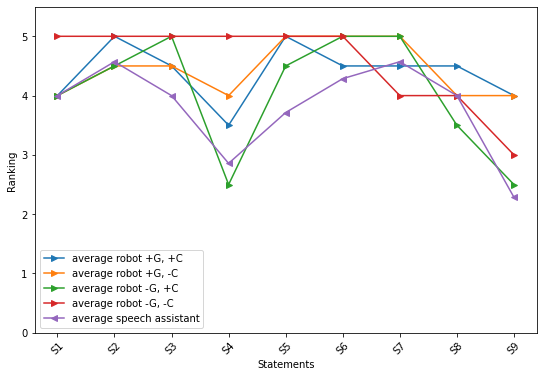

In [22]:
mean_comparison_per_condition(speech_exp, [GC_robot_overall, Gc_robot_overall, gC_robot_overall, gc_robot_overall], mode = "c")

> In this plot, no graph has changed in comparison to the previous plots, it is only the case that all robot curves were taken together in one plot to allow for direct comparison. What is illustrated very nicely in this plot is that even though all curves follow the same scheme (among this is the significant drop for every curve except for one at statement four) no two curves are identical. The drops can be more or less severe, while the stable levels before and after this significant decrease are at different heights.

> What could also be influencing the appearance of the graphs, with special regards to the sudden drop at S4 is the fact that the speech assistant software that was used had severe troubles understanding male voices. This can be seen especially for condition G-, C- (one participant, female) in contrast to condition -G, +C (two participants, male and female), where the male participants struggled tremendously when it came to communicating with the device.

#### 3.2.3) Pleasantness
##### 3.2.3.1) Separated Plots

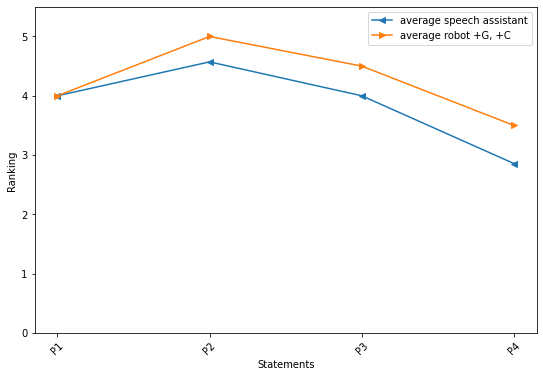

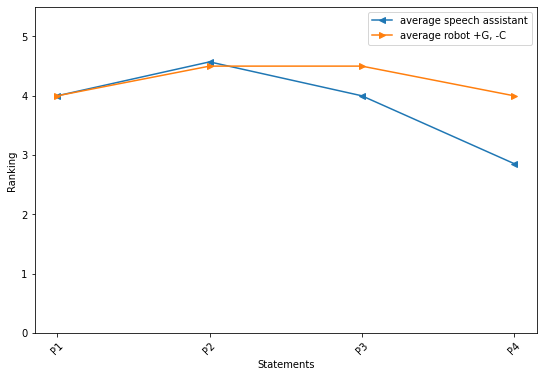

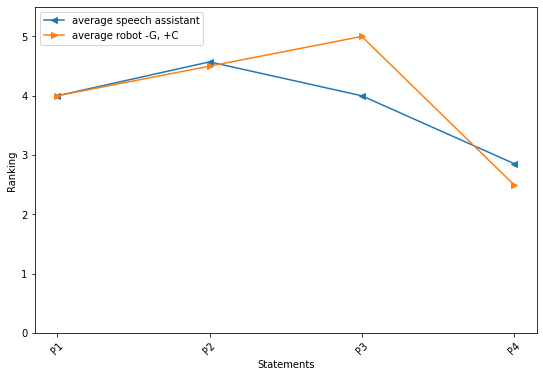

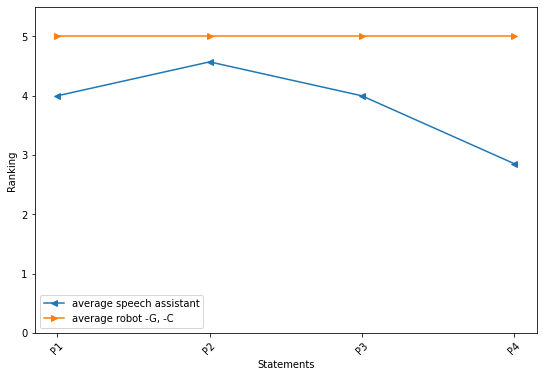

In [23]:
mean_comparison_per_condition(speech_pl, [GC_robot_pl, Gc_robot_pl, gC_robot_pl, gc_robot_pl], mode = "s")

> Concerning pleasantness though it is the case that the results are a lot clearer. Often, there is even a large margin between the two graphs for the speech assistant and the robot respectively. It is only in two cases - both conditions where only one of the two aspects is present in an advanced way - that the robot graph hits a point below the average speech assistant curve. Nevertheless, these drops are minimal and only affect the statements S2 and S4, the latter one of which was also responsible for the enormous drop in the previous examples.

##### 3.2.3.1) Combined Plots

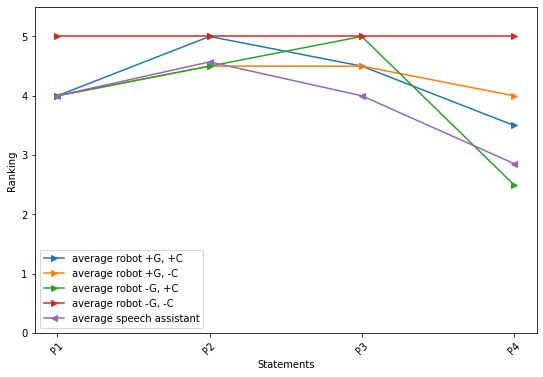

In [24]:
mean_comparison_per_condition(speech_pl, [GC_robot_pl, Gc_robot_pl, gC_robot_pl, gc_robot_pl], mode = "c")

> In this summary plot, what can be seen is that participants actually have quite strong preferences in favour of the robot over the speech assistant. It is not the case that this can be formulated as a general statement, as the differences are not significant and as there were too few participants taking part. It is still the case, though, that participants rate any form of robot more pleasant than the device.

#### 3.2.4) Effectiveness
##### 3.2.4.1) Separated Plots

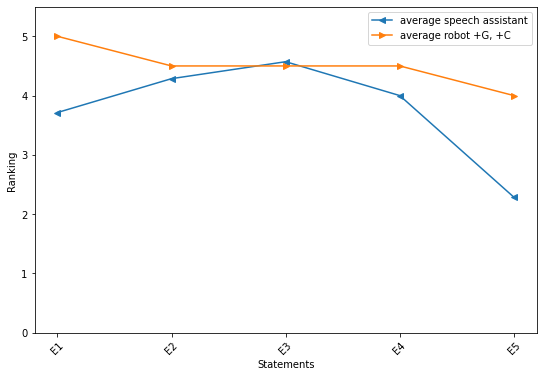

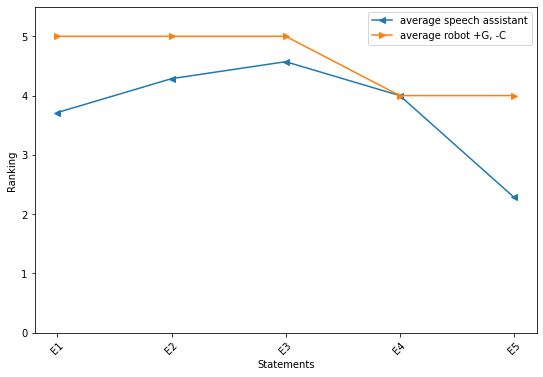

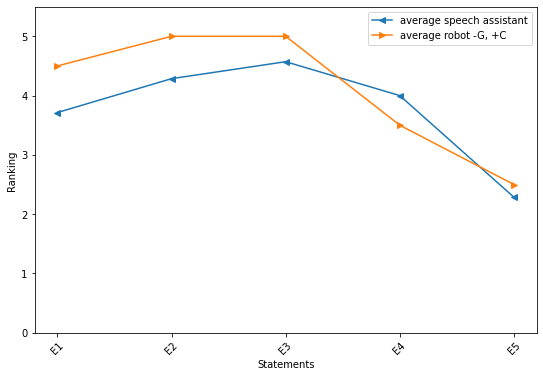

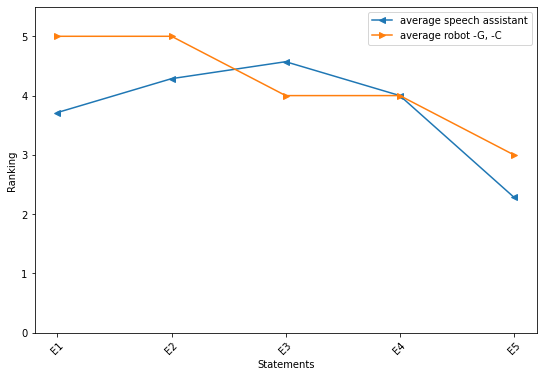

In [25]:
mean_comparison_per_condition(speech_eff, [GC_robot_eff, Gc_robot_eff, gC_robot_eff, gc_robot_eff], mode = "s")

> For effectiveness, it is the case that the robot, even if it was never really able to provide more help than the speech assistant, was seen as more effective than the speech assistant. Especially concerning the point "The device helped solving the tasks", there is a strong effect of whether the device was the robot or the speech assistant. Concerning the latter statements like whether the device was part of the furniture, most participants answered identically, but a tremendous difference can be seen concerning the first effectiveness statement. This statement inquires to which degree the device was used for solving the tasks and received significantly better ratings for all types of the robot.

##### 3.2.4.1) Combined Plots

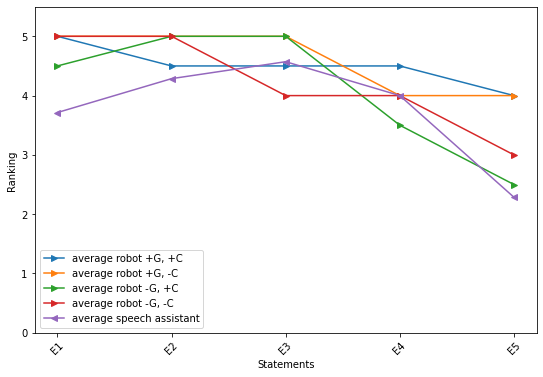

In [26]:
mean_comparison_per_condition(speech_eff, [GC_robot_eff, Gc_robot_eff, gC_robot_eff, gc_robot_eff], mode = "c")

> In this plot, it can be seen that most robot graphs are positioned above the average speech assistant graph. The robot, no matter what it was and was not capable of doing, was seen as more effective than the speech assistant, apart from the fact that participants have reported making more use of it.

### 3.3) Does pleasantness increase when effectiveness increases?

In other words, is there a relation between effectiveness and pleasantness? To assess that, we will first look at the curves:

Text(0.0, 1.0, 'Correlation robot')

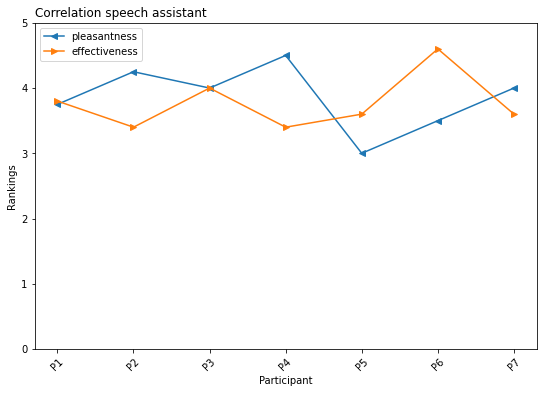

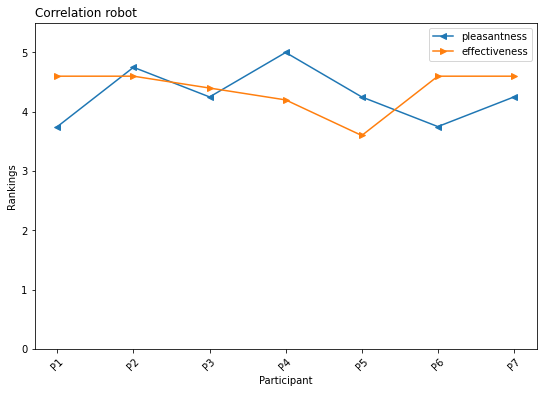

In [27]:
# getting the x-axis ticks:
labels = np.array("P1")
    
for p in range (6):
    labels = np.append(labels, "P" + str(p+2))
        
# construct the plot (speech assistant):
plt.figure(figsize = (9, 6))
plt.plot(labels, means_speech_pl, marker = "<", label = "pleasantness")
plt.plot(labels, means_speech_eff, marker = ">", label = "effectiveness")
plt.ylim(0, 5)
plt.xticks(rotation = 45)
plt.xlabel("Participant")
plt.ylabel("Rankings")
plt.legend()
plt.title(label  = "Correlation speech assistant", loc = "left")


# construct the plot (robot):
plt.figure(figsize = (9, 6))
plt.plot(labels, means_robot_pl, marker = "<", label = "pleasantness")
plt.plot(labels, means_robot_eff, marker = ">", label = "effectiveness")
plt.ylim(0, 5.5)
plt.xticks(rotation = 45)
plt.xlabel("Participant")
plt.ylabel("Rankings")
plt.legend()
plt.title(label  = "Correlation robot", loc = "left")

> This indiciates that there is no real correlation between pleasantness and effectiveness of the device. To make sure though, we will stil have a closer look at the numerical correlation coefficient for effectiveness and pleasantness. The following formula will be used:


$$
C_{x, y} = \frac {S_{x, y}} {\sqrt{S_{x, x}} \sqrt{S_{y, y}}}
$$

In [28]:
# function definition:
def corr(x, y):
    """
    Returns the correlation coefficient C_{x, y} of two variables x and y
    ----------------------------------------------------
    inputs: x (np.array)
            y (np.array)
    ----------------------------------------------------
    output: C_{x, y} (float), according to formula above"""
    
    
    # 1)first, taking means and standard deviations:
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # calculate S_{x, y}:
    s_xy = 0
    for index in range (len(x)):
        s_xy = s_xy + ((x[index] + mean_x) * (y[index] - mean_y))
        
    s_xx = 0
    for index in range (len(x)):
        s_xx = s_xx + np.sqrt((x[index] + mean_x))
        
    s_yy = 0
    for index in range (len(x)):
        s_yy = s_yy + np.sqrt((y[index] + mean_y))

    # computing the correlation:
    return s_xy / (np.sqrt(s_xx) * np.sqrt(s_yy))

In [30]:
print("Correlation for speech assistant device: " + str(corr(means_speech_eff, means_speech_pl)))
print("Correlation for robot device:          : " + str(corr(means_robot_eff, means_robot_pl)))

# nicer output:
cor = {"correlation coefficient" : [corr(means_speech_eff, means_speech_pl), corr(means_robot_eff, means_robot_pl)]}
pd.DataFrame(cor, ["Speech assistant", "Robot"])

Correlation for speech assistant device: -0.027350631531221612
Correlation for robot device:          : -0.011794736464180389


,correlation coefficient
Speech assistant,-0.027351
Robot,-0.011795


> As can be seen, the correlation coefficients fit the graphs quite well. There is no proper correlation between pleasantness and effectivenss within the gathered data.

## 4) Conclusions

In the following, see a small summary of what can be claimed on the basis of the data that is given:
- It is possible to say that participants generally rated the statements in favour of the robot.
- It is not possible to say that there was a condition with outstandingly well results where participants reported exceptionally good results on a particular type of robot. As a consequence, we point out a positive effect of gesture or communication ability on the subjectively experienced pleasantness in the interaction with the device.
- Generally, it is of utmost importance to keep in mind the fact that the total number of participants is seven. The results we were presenting here, cannot be called significant and might be tied to individual character traits like enthusiasm. Nevertheless, there is a chance that with a greater number of participants, many potential conclusions we draw could be confirmed.
- Though what we point out is not significant, the data comprises a strong tendency towards the robot being more pleasant than the speech assistant, in the way that both of the devices were presented to the participants.

For more information on the experiment, as well as a deeper discussion of the results, have a look at the discussion section of the project documentation that can be found in [this GitHub repository](https://github.com/Kirschberg32/I-Lo).